**1. Importing Dependies**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

 **2. Loading Datasets and Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop(columns=['customerID'],inplace=True)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
print(df["gender"].unique())

['Female' 'Male']


In [ ]:
print(df["SeniorCitizen"].unique())

[0 1]


In [ ]:
#Printing all the uniques values in each colums
for col in df.columns:
  print(col,df[col].unique())
  print("-"*100)

gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-

In [ ]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0"})

In [ ]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:


df["TotalCharges"]=df["TotalCharges"].astype("float64")

In [ ]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


**Insights**

1.Removed the customerid column

2.there is no null values.

3.replaced the values of totalcharges with 0 and changed the datatype as float64

4.imbalance in the churn column


**3.Exploratory Data Analysis**

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Visualisation EDA Process**

In [ ]:
#histogram plot
def visual(df,column):
  plt.figure(figsize=(7,4))
  sns.histplot(df[column],kde=True)

  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")

  col_mean=df[column].mean()
  col_median=df[column].median()

  #visualizing the mean and meadian

  plt.axvline(col_mean,color="red",linestyle="--",label="mean")
  plt.axvline(col_median,color="green",linestyle="-",label="median")
  plt.legend()
  plt.show()



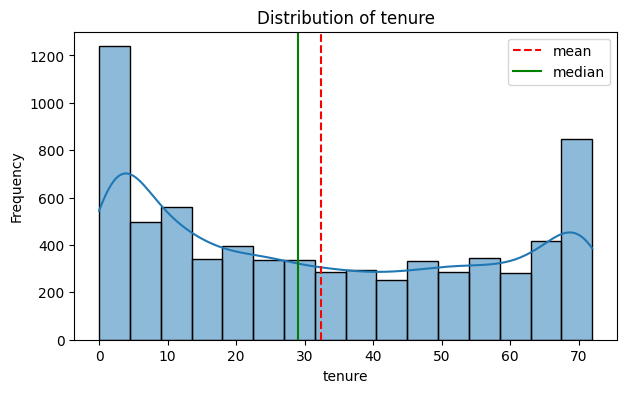

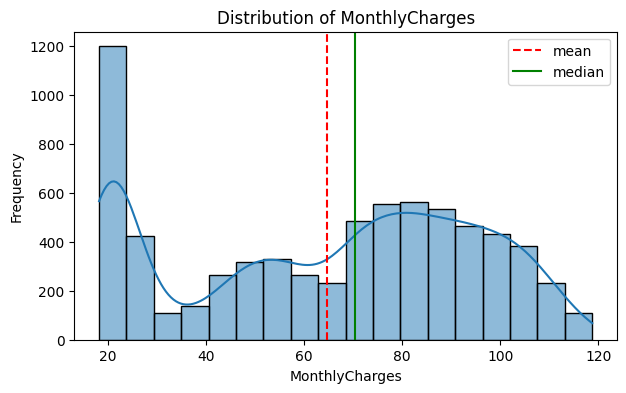

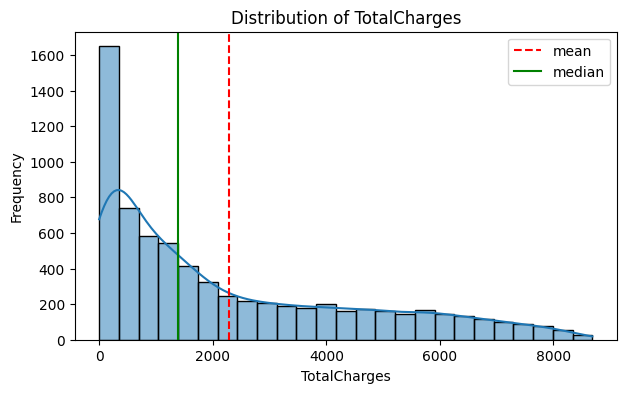

In [ ]:
numerical_list=["tenure","MonthlyCharges","TotalCharges"]
for col in numerical_list:
  visual(df,col)

In [ ]:
#Box plot
def box_plot(df,column):
  plt.figure(figsize=(7,3))
  sns.boxplot(y=df[column])
  plt.title(f"box plot of {column}")
  plt.ylabel(column)
  plt.show()

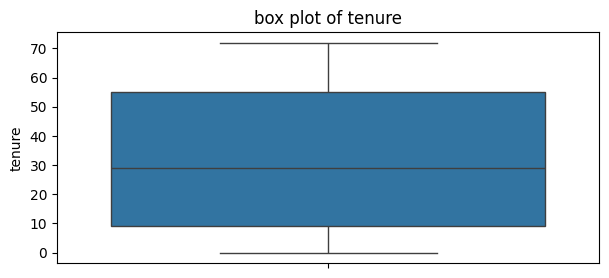

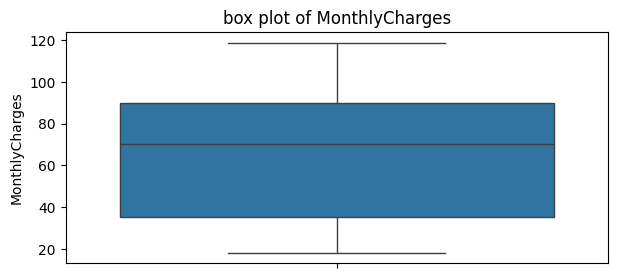

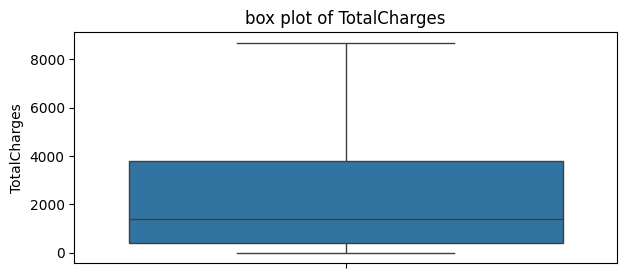

In [ ]:

numerical_list=["tenure","MonthlyCharges","TotalCharges"]
for col in numerical_list:
  box_plot(df,col)

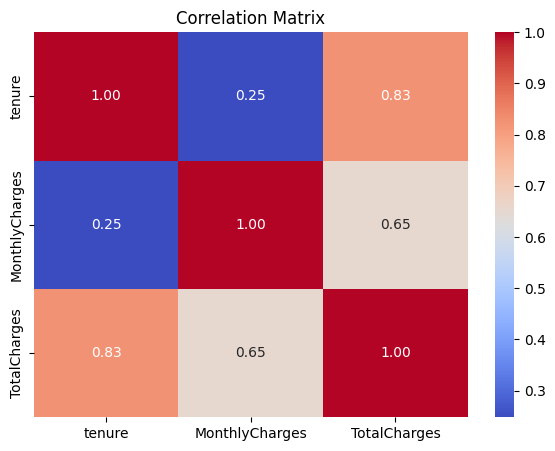

In [ ]:
#correlation matrix - heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Categorical Data -Analysis**

In [ ]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
object_columns=df.select_dtypes(include="object").columns.to_list()
object_columns=["SeniorCitizen"]+ object_columns
object_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

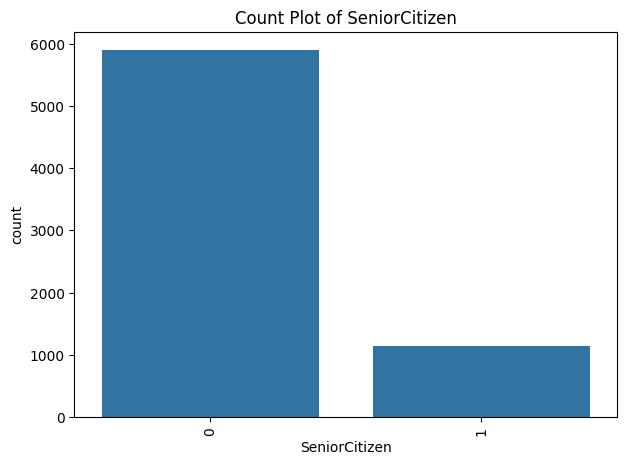

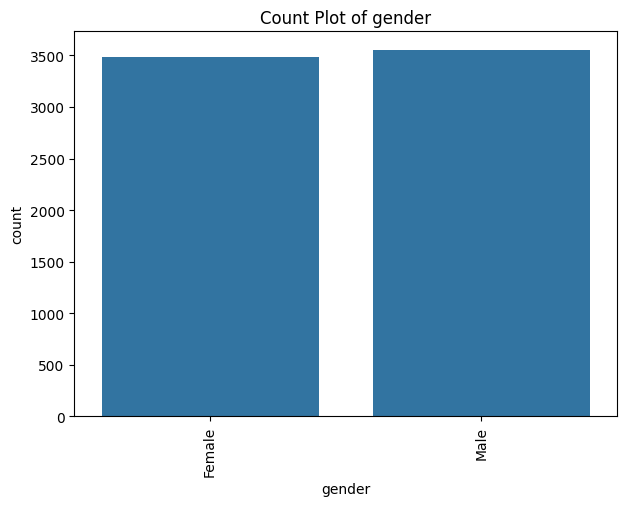

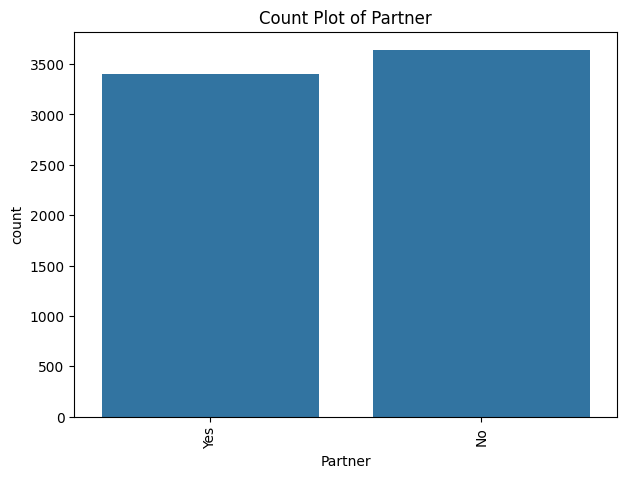

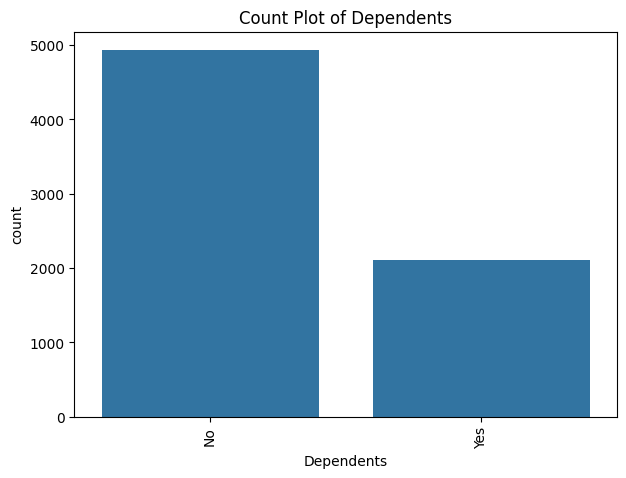

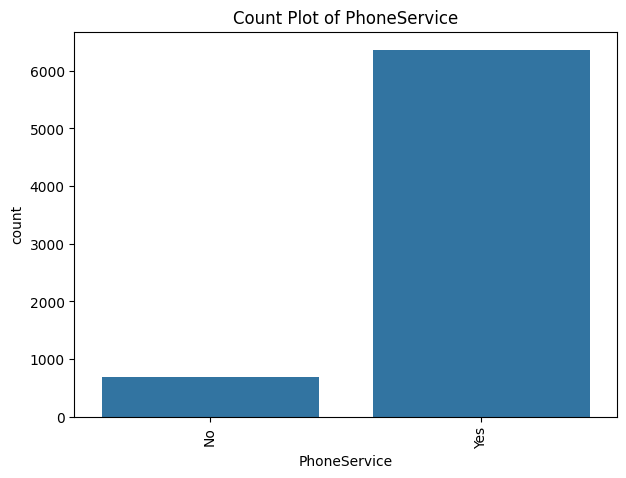

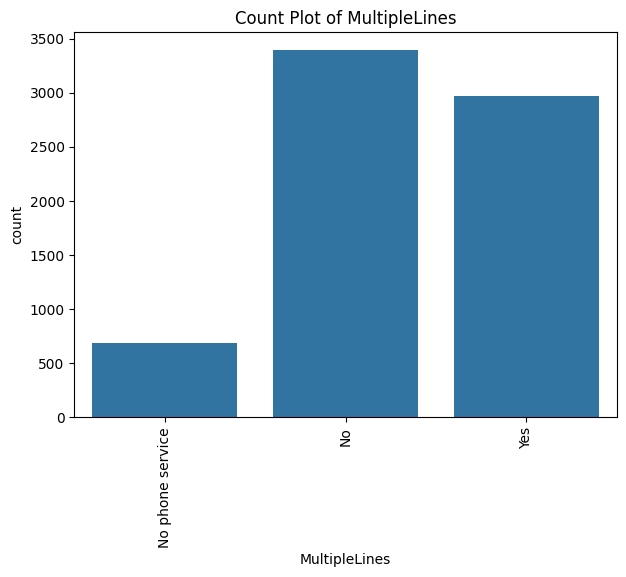

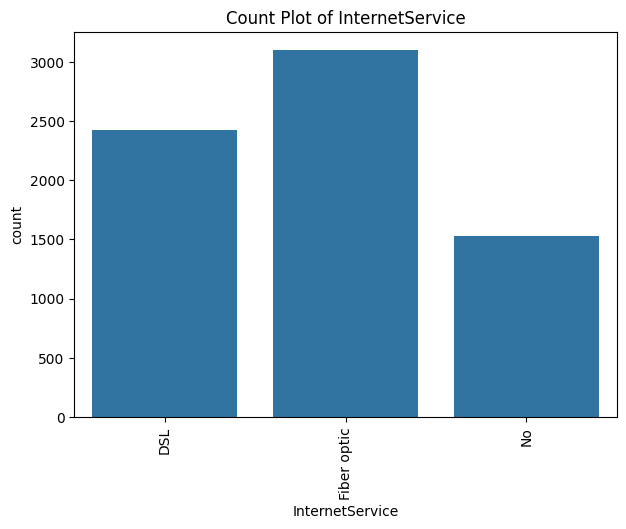

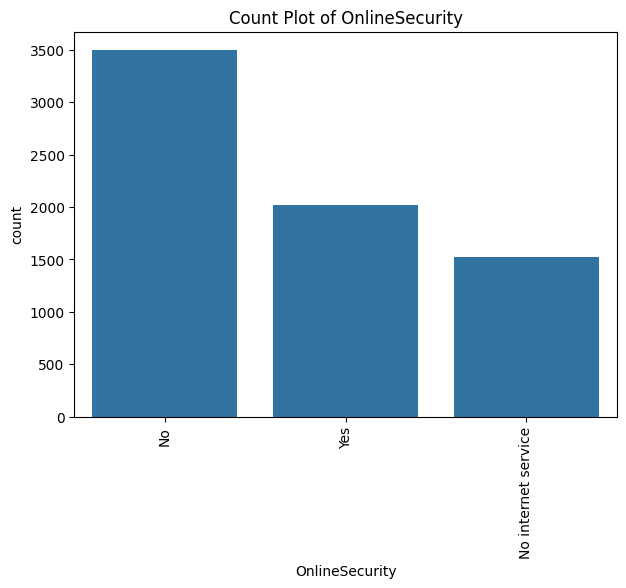

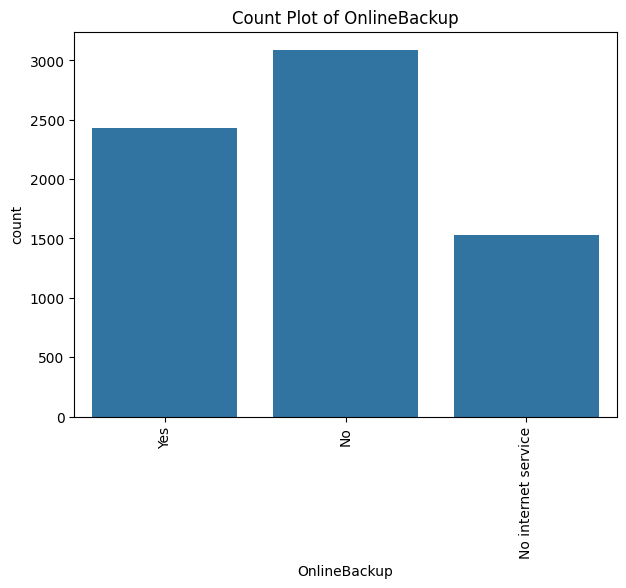

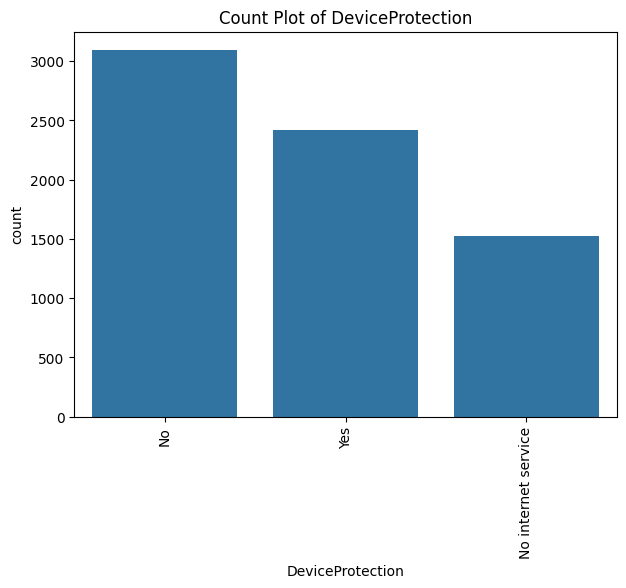

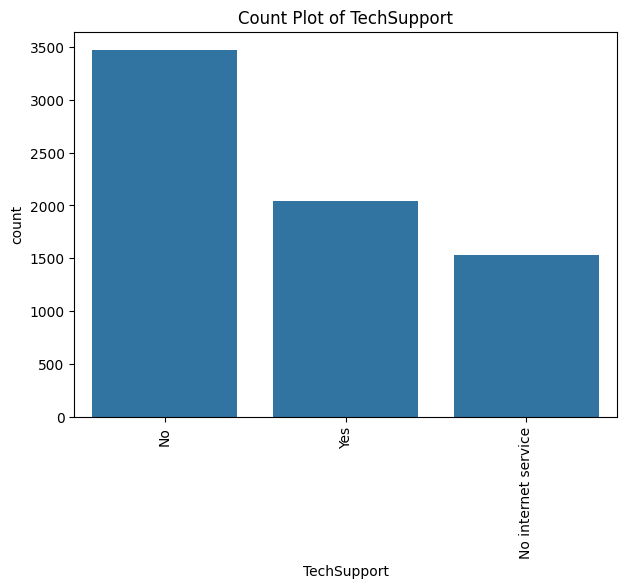

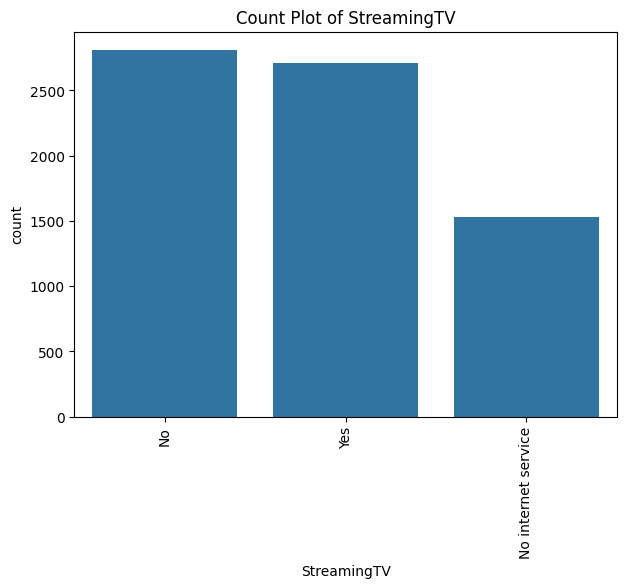

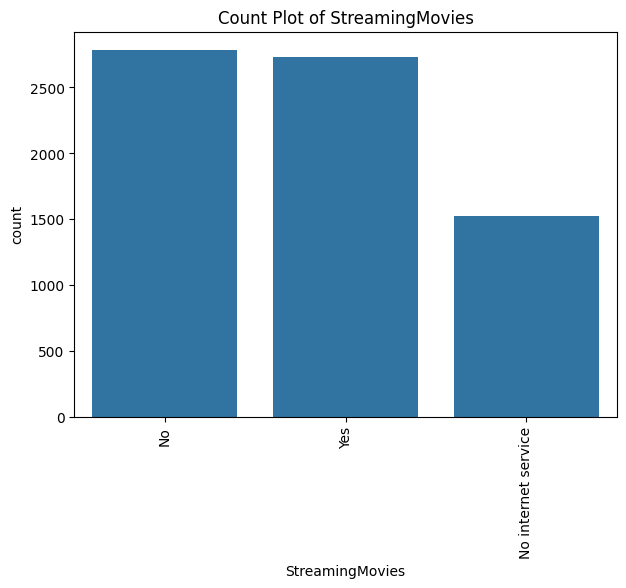

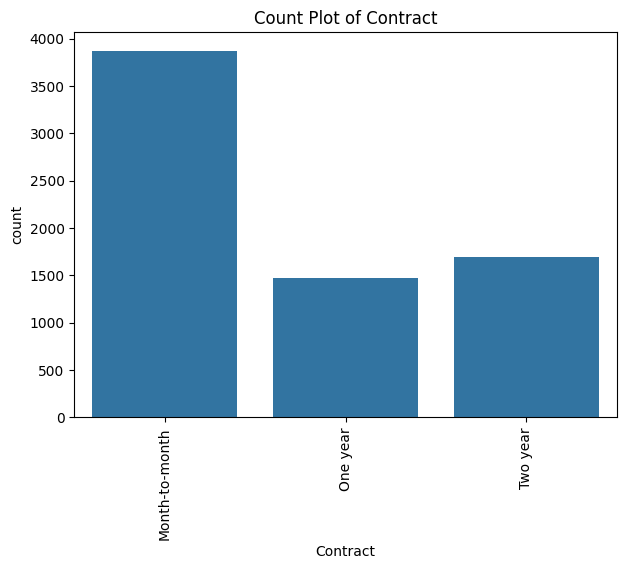

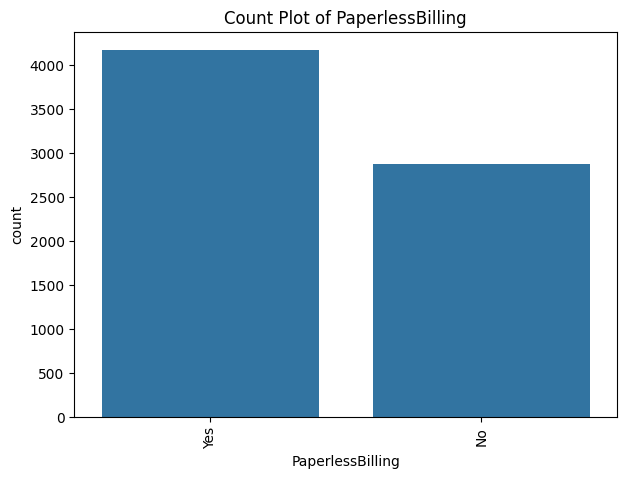

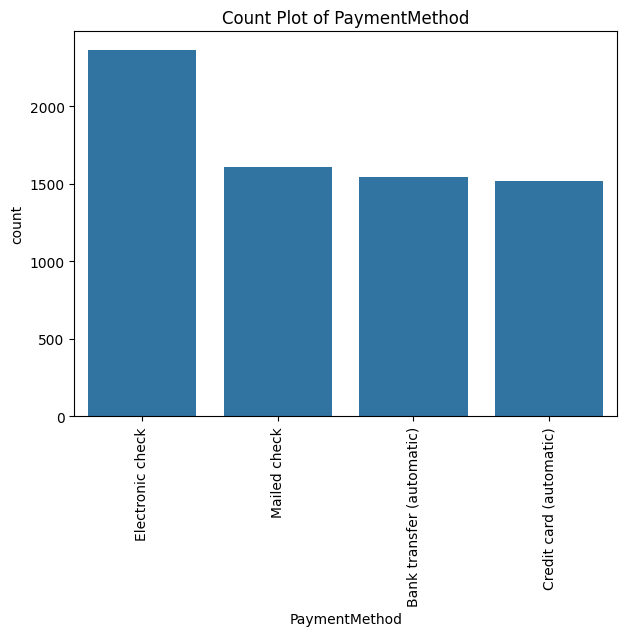

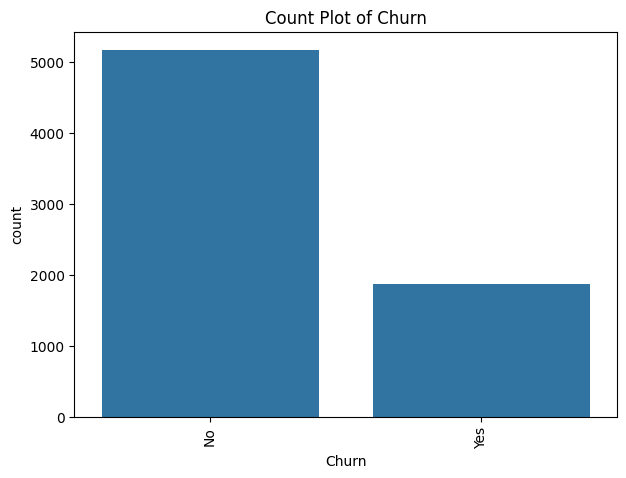

In [ ]:
#Count plot
for column in object_columns:
  plt.figure(figsize=(7,5))
  sns.countplot(x=df[column])
  plt.title(f"Count Plot of {column}")
  plt.xlabel(column)
  plt.xticks(rotation=90)
  plt.show()


**Encoding the categorical values**

In [ ]:

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
#Encoding the target values

In [ ]:
df["churn"]=df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-422550312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["churn"]=df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
# Reload the original dataset to get the categorical columns back
df_original = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop the customerID column as it's not needed for encoding
df_original.drop(columns=['customerID'], inplace=True)

# Identify categorical columns (excluding the target 'Churn' which we'll encode separately)
categorical_cols = df_original.select_dtypes(include='object').columns.tolist()
# Remove 'Churn' from the list if it's there, as it's handled separately
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')


# Initialize the encoders dictionary
encoders = {}

# Iterate through the categorical columns and create/fit LabelEncoders
for col in categorical_cols:
    label_encoder = LabelEncoder()
    # Fit the encoder on the original data of the column
    df_original[col] = label_encoder.fit_transform(df_original[col])
    # Store the fitted encoder in the dictionary
    encoders[col] = label_encoder

# Display the encoders dictionary to show the fitted encoders
print("Encoders dictionary:")
print(encoders)

with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

Encoders dictionary:
{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder(), 'TotalCharges': LabelEncoder()}


In [ ]:
#encoding remaining categorical values
objects = df.select_dtypes(include=["object", "category", "string"]).columns
for col in objects:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])





In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,1


In [ ]:
df.shape

(7043, 21)

**Train_test_split Datasets**

In [ ]:
X = df.drop(columns=["Churn", "churn"], errors="ignore")
y = df["Churn"]


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [ ]:
print(X_train.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


***Synthetic Minority OverSampling Technique(SMOTE)***

In [ ]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [ ]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


**Model Training**

Default parameter tuning

In [ ]:
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}


In [ ]:
#Cross Validation with 5-fold
cv_scores={}

for model_name,model in models.items():
  print(f"Training {model_name} with default parameter")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross validation score accuracy: {np.mean(scores):.2f}")

Training Decision Tree with default parameter
Decision Tree cross validation score accuracy: 0.78
Training Random Forest with default parameter
Random Forest cross validation score accuracy: 0.84
Training XGBoost with default parameter
XGBoost cross validation score accuracy: 0.83


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

**Random Forest gives us the highest accuracy among the three classifier**

In [ ]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

## ***6. Model Evaluation***

In [ ]:
y_pred=rfc.predict(X_test)


In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))
print("Classification report",classification_report(y_test,y_pred))


Accuracy 0.7785663591199432
confusion_matrix [[878 158]
 [154 219]]
Classification report               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
model_data={"model":rfc,"model_features":X.columns.tolist()}

with open("churn_prediction_model.pkl","wb") as f:
  pickle.dump(model_data,f)

In [ ]:
loaded_model=model_data["model"]
loaded_features=model_data["model_features"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(loaded_features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
sample_customer_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85,
}

pred_df=pd.DataFrame([sample_customer_data])

with open("encoders.pkl", "rb") as f:
  encoders= pickle.load(f)
pred_df.head()

for col in pred_df.select_dtypes(include="object").columns:
  pred_df[col]=encoders[col].transform(pred_df[col])

pred_df.head()

prediction=loaded_model.predict(pred_df)
prediction_prob=loaded_model.predict_proba(pred_df)

print("Churn" if prediction[0]==1 else "No Churn")
print("Probability of Churn:",prediction_prob)

No Churn
Probability of Churn: [[0.78 0.22]]
